In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_frame = pd.read_csv(city_data_to_load)
ride_frame = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
join_frame = pd.merge(ride_frame, city_frame, how='left')


In [3]:
# Display the data table for preview
join_frame.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [4]:
average_fare = join_frame.groupby('city')['fare'].mean()
total_rides = join_frame.groupby('city')['ride_id'].count()
total_drivers = join_frame.groupby('city')['driver_count'].value_counts().reset_index(name='total_rides')
city_type = join_frame.groupby(['city', 'type'])['type'].count().index.get_level_values('type')
average_frame = pd.DataFrame(total_drivers)

average_frame['average_fare'] = average_fare.tolist()

average_frame['city_type'] = city_type.tolist()
average_frame.head()


,city,driver_count,total_rides,average_fare,city_type
0,Amandaburgh,12,18,24.641667,Urban
1,Barajasview,26,22,25.332273,Urban
2,Barronchester,11,16,36.422500,Suburban
3,Bethanyland,22,18,32.956111,Suburban
4,Bradshawfurt,7,10,40.064000,Rural


In [5]:
# Obtain the x and y coordinates for each of the three city types
#x_coords = average_frame['average_fare'].tolist()
#y_coords = average_frame['total_rides'].tolist()
#bubble_size = average_frame['driver_count'].tolist()
colors = ['gold', 'dodgerblue', 'orangered']
city_groups = average_frame.groupby('city_type')#.sort_values(by=['city_type'])
#city_groups.head()




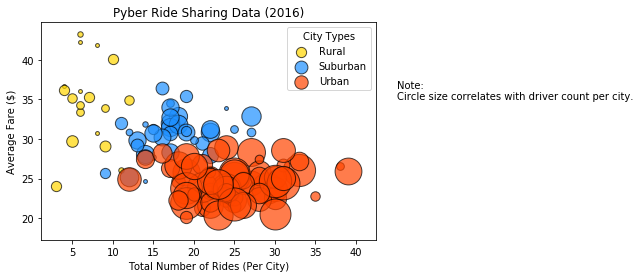

In [6]:
# Build the scatter plots for each city types
fig, ax = plt.subplots()
#ax.set_color_cycle(colors)
ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")
ax.set_title("Pyber Ride Sharing Data (2016)")



dict_scatter = {'x':[],'y':[],'s':[]}
counter = 0

for x, group in city_groups:
    flag = True
    x = group.total_rides.tolist()
    y = group.average_fare.tolist()
    size= group.driver_count.tolist()
    for elem in range(len(group.total_rides.tolist())):
        if flag:
            flag = False
            ax.scatter(x[elem], y[elem], s=size[elem]*15, marker='o', c=colors[counter], alpha=.7,edgecolors="black", linewidth=1,label=group.city_type.tolist()[0])
        else:
           ax.scatter(x[elem], y[elem], s=size[elem]*15, marker='o', c=colors[counter], alpha=.7,edgecolors="black", linewidth=1)
    counter += 1
    
#plt.scatter(city_groups['total_rides'][:10], city_groups['average_fare'][:10], s=city_groups['driver_count'][:10]*10, c=colors, alpha=0.9)
#ax.plot(markersize=[])
text = 'Note:\nCircle size correlates with driver count per city.'
ax.legend(title='City Types')
ax.text(45, 35, text, ha='left', rotation=0, wrap=False)
plt.show()

fig.savefig('Pyber Ride Sharing Data.png')

## Total Fares by City Type

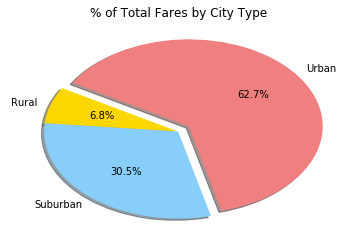

In [31]:
# Calculate Type Percents
total_fare = join_frame['fare'].sum()
#total_fare
total_by_zone = join_frame.groupby(['city','type'])['fare'].sum().groupby('type').sum()
#total_by_zone
city_fares = pd.DataFrame(total_by_zone)

#city_fares.columns = ['city_number']
city_fares = city_fares.reset_index()
city_fares.columns = ['city_type', 'total_fares']
city_fares['city_average'] = (city_fares['total_fares'] *100) / total_fare
city_fares


# Build Pie Chart

labels = city_fares['city_type'].tolist()
sizes = city_fares['city_average'].tolist()
colors = ['gold',  'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
 
#plt.axis('equal')
plt.title('% of Total Fares by City Type')
plt.savefig('Total Fares by City.png')
plt.show()
# Save Figure


## Total Rides by City Type

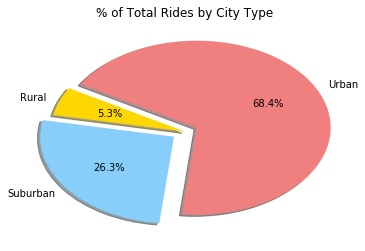

In [60]:
# Calculate Ride Percents
total_rides = join_frame.groupby(['city','type'])['ride_id'].count().sum()
total_ride_zone = join_frame.groupby(['city','type'])['ride_id'].count().groupby('type').sum()
rides_frame = pd.DataFrame(total_ride_zone)
rides_frame = rides_frame.reset_index()
rides_frame.columns =['city_type','total_rides']
rides_frame['rides_percentage'] = (rides_frame['total_rides'] * 100) / total_rides
rides_frame
# Build Pie Chart
labels = rides_frame['city_type'].tolist()
sizes = rides_frame['rides_percentage'].tolist()
colors = ['gold',  'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
 
#plt.axis('equal')
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig('Total Rides by City.png')
plt.show()

## Total Drivers by City Type

In [97]:
# Calculate Driver Percents
total_drivers = pd.DataFrame(join_frame.groupby(['city','type'])['driver_count'].value_counts())
del total_drivers['driver_count']
total_drivers = total_drivers.reset_index()
t_drivers = total_drivers['driver_count'].sum()
t_driver_group = total_drivers.groupby('type')['driver_count'].sum()
t_driver_group

driver_frame = pd.DataFrame(t_driver_group)
driver_frame = driver_frame.reset_index()
driver_frame['driver percentage'] = (driver_frame['driver_count']*100)/t_drivers
driver_frame
# Build Pie Charts

# Save Figure


,type,driver_count,driver percentage
0,Rural,78,2.623613
1,Suburban,490,16.481668
2,Urban,2405,80.894719


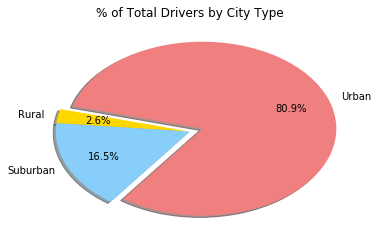

In [6]:
# Show Figure
labels = driver_frame['type'].tolist()
sizes = driver_frame['driver percentage'].tolist()
colors = ['gold',  'lightskyblue', 'lightcoral']
explode = (0, 0, 0.2)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
 
#plt.axis('equal')
plt.title('% of Total Drives by City Type')

# Save Figure
plt.savefig('Total Drives by City.png')
plt.show()